# <font color='brown'>Machine-Learning-Cook</font>

# 教程 1-3：Pandas

## 教程介绍

![](http://i1.fuimg.com/649601/5f580aa328a756de.png)

Pandas 是基于 NumPy 的一种数据处理工具，该工具为了解决数据分析任务而创建。Pandas 纳入了大量库和一些标准的数据模型，提供了高效地操作大型数据集所需的函数和方法。  

Pandas 的数据结构：Pandas 主要有 Series（一维数组），DataFrame（二维数组），Panel（三维数组），Panel4D（四维数组），PanelND（更多维数组）等数据结构。其中 Series 和 DataFrame 应用的最为广泛。
- Series 是一维带标签的数组，它可以包含任何数据类型。包括整数，字符串，浮点数，Python 对象等。Series 可以通过标签来定位。
- DataFrame 是二维的带标签的数据结构。我们可以通过标签来定位数据。这是 NumPy 所没有的。

### 教程知识点
本次教程涉及的知识点主要有：
- 创建Series
- Series基本操作
- 创建DataFrame
- DataFrame基本操作
- DataFrame文件操作
- Series，DataFrame和多索引
- 透视表
- 数据清洗
- 数据预处理
- 可视化

### 教程环境

- Python 3.6
- NumPy
- Pandas

### 目录索引

- <a href="#1">1. 基础部分</a>
- <a href="#2">2. 进阶部分</a>
- <a href="#3">3. 总结</a>

## <a id = "1">1. 基础部分</a>

### 导入 Pandas 模块

#### 1. 导入 Pandas
练习 Pandas 之前，首先需要导入 Pandas 模块，并约定简称为 `pd`。

In [2]:
import pandas as pd

In [3]:
# 在空白单元格中重复输入上面的代码练习，亲自动手，不要复制粘贴


#### 2. 查看 Pandas 版本信息

In [4]:
print(pd.__version__)

0.22.0


### 创建 Series 数据类型

Pandas 中，Series 可以被看作由 1 列数据组成的数据集。

创建 Series 语法：`s = pd.Series(data, index=index)`，可以通过多种方式进行创建，以下介绍了 3 个常用方法。

#### 3. 从列表创建 Series

In [5]:
arr=[0, 1, 2, 3, 4]
s1=pd.Series(arr) # 如果不指定索引，则默认从 0 开始
s1

0    0
1    1
2    2
3    3
4    4
dtype: int64

提示：前面的 `0,1,2,3,4` 为当前 Series 的索引，后面的 `0,1,2,3,4` 为 Series 的值。

#### 4. 从 Ndarray 创建 Series

In [6]:
import numpy as np
n=np.random.randn(5) # 创建一个随机 Ndarray 数组

index=['a','b','c','d','e']
s2=pd.Series(n,index=index)
s2

a   -0.842016
b   -0.508459
c    1.047840
d    1.829551
e    0.251809
dtype: float64

#### 5. 从字典创建 Series

In [7]:
d={'a':1,'b':2,'c':3,'d':4,'e':5}
s3=pd.Series(d)
s3

a    1
b    2
c    3
d    4
e    5
dtype: int64

### Series 基本操作

#### 6. 修改 Series 索引

In [8]:
print(s1) # 以 s1 为例

s1.index=['A','B','C','D','E'] # 修改后的索引
s1

0    0
1    1
2    2
3    3
4    4
dtype: int64


A    0
B    1
C    2
D    3
E    4
dtype: int64

#### 7. Series 纵向拼接

In [9]:
s4=s3.append(s1) # 将 s1 拼接到 s3
s4

a    1
b    2
c    3
d    4
e    5
A    0
B    1
C    2
D    3
E    4
dtype: int64

#### 8. Series 按指定索引删除元素

In [10]:
print(s4)
s4=s4.drop('e') # 删除索引为 e 的值
s4

a    1
b    2
c    3
d    4
e    5
A    0
B    1
C    2
D    3
E    4
dtype: int64


a    1
b    2
c    3
d    4
A    0
B    1
C    2
D    3
E    4
dtype: int64

#### 9. Series 修改指定索引元素

In [11]:
s4['A']=6 # 修改索引为 A 的值 = 6
s4

a    1
b    2
c    3
d    4
A    6
B    1
C    2
D    3
E    4
dtype: int64

#### 10. Series 按指定索引查找元素

In [12]:
s4['B']

1

#### 11. Series 切片操作
例如对`s4`的前 3 个数据访问

In [13]:
s4[:3]

a    1
b    2
c    3
dtype: int64

### Series 运算

#### 12. Series 加法运算
Series 的加法运算是按照索引计算，如果索引不同则填充为 `NaN`（空值）。

In [14]:
print(s3)
print(s4)
s4.add(s3)

a    1
b    2
c    3
d    4
e    5
dtype: int64
a    1
b    2
c    3
d    4
A    6
B    1
C    2
D    3
E    4
dtype: int64


A    NaN
B    NaN
C    NaN
D    NaN
E    NaN
a    2.0
b    4.0
c    6.0
d    8.0
e    NaN
dtype: float64

#### 13. Series 减法运算
Series的减法运算是按照索引对应计算，如果不同则填充为 `NaN`（空值）。

In [15]:
s4.sub(s3)

A    NaN
B    NaN
C    NaN
D    NaN
E    NaN
a    0.0
b    0.0
c    0.0
d    0.0
e    NaN
dtype: float64

#### 14. Series 乘法运算
Series 的乘法运算是按照索引对应计算，如果索引不同则填充为 `NaN`（空值）。

In [16]:
s4.mul(s3)

A     NaN
B     NaN
C     NaN
D     NaN
E     NaN
a     1.0
b     4.0
c     9.0
d    16.0
e     NaN
dtype: float64

#### 15. Series 除法运算
Series 的除法运算是按照索引对应计算，如果索引不同则填充为 `NaN`（空值）。

In [17]:
s4.div(s3)

A    NaN
B    NaN
C    NaN
D    NaN
E    NaN
a    1.0
b    1.0
c    1.0
d    1.0
e    NaN
dtype: float64

#### 16. Series 求均值

In [18]:
s4.median()

3.0

#### 17. Series 求和

In [19]:
s4.sum()

26

#### 18. Series 求最大值

In [20]:
s4.max()

6

#### 19. Series 求最小值

In [21]:
s4.min()

1

### 创建 DataFrame 数据类型

与 Sereis 不同，DataFrame 可以存在多列数据。一般情况下，DataFrame 也更加常用。

#### 20. 通过 NumPy 数组创建 DataFrame

In [22]:
dates=pd.date_range('today',periods=6) # 定义时间序列作为 index
num_arr=np.random.randn(6,4) # 传入 numpy 随机数组
columns=['A','B','C','D'] # 将列表作为列名
df1=pd.DataFrame(num_arr,index=dates,columns=columns)
df1

,A,B,C,D
2018-06-14 08:35:24.266594,-0.072097,0.365583,-0.071751,0.191610
2018-06-15 08:35:24.266594,0.939166,1.077413,-0.160385,-0.557109
2018-06-16 08:35:24.266594,1.622176,0.250222,1.216798,1.922155
2018-06-17 08:35:24.266594,-0.705818,-1.521209,0.108573,0.112693
2018-06-18 08:35:24.266594,-1.866599,1.775785,-1.029466,-0.230036
2018-06-19 08:35:24.266594,-0.528026,-1.260225,-0.314820,0.583224


### 21. 通过字典数组创建 DataFrame

In [23]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df2 = pd.DataFrame(data, index=labels)
df2

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


#### 22. 查看 DataFrame 的数据类型

In [24]:
df2.dtypes

age         float64
animal       object
priority     object
visits        int64
dtype: object

### DataFrame 基本操作

#### 23. 预览 DataFrame 的前 5 行数据

此方法对快速了解陌生数据集结构十分有用。

In [25]:
df2.head() # 默认为显示 5 行，可根据需要在括号中填入希望预览的行数

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2


#### 24. 查看 DataFrame 的后 3 行数据

In [26]:
df2.tail(3)

,age,animal,priority,visits
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


#### 25.查看 DataFrame 的索引

In [27]:
df2.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')

#### 26. 查看 DataFrame 的列名

In [28]:
df2.columns
# type(df2.columns)

Index(['age', 'animal', 'priority', 'visits'], dtype='object')

#### 27. 查看 DataFrame 的数值

In [29]:
df2.values
# type(df2.values)

array([[2.5, 'cat', 'yes', 1],
       [3.0, 'cat', 'yes', 3],
       [0.5, 'snake', 'no', 2],
       [nan, 'dog', 'yes', 3],
       [5.0, 'dog', 'no', 2],
       [2.0, 'cat', 'no', 3],
       [4.5, 'snake', 'no', 1],
       [nan, 'cat', 'yes', 1],
       [7.0, 'dog', 'no', 2],
       [3.0, 'dog', 'no', 1]], dtype=object)

#### 28. 查看 DataFrame 的统计数据

In [30]:
df2.describe()

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


#### 29. DataFrame 转置操作

In [31]:
df2.T

,a,b,c,d,e,f,g,h,i,j
age,2.5,3,0.5,NaN,5,2,4.5,NaN,7,3
animal,cat,cat,snake,dog,dog,cat,snake,cat,dog,dog
priority,yes,yes,no,yes,no,no,no,yes,no,no
visits,1,3,2,3,2,3,1,1,2,1


#### 30. 对 DataFrame 进行按列排序

In [32]:
df2.sort_values(by='age') # 按 age 升序排列

,age,animal,priority,visits
c,0.5,snake,no,2
f,2.0,cat,no,3
a,2.5,cat,yes,1
b,3.0,cat,yes,3
j,3.0,dog,no,1
g,4.5,snake,no,1
e,5.0,dog,no,2
i,7.0,dog,no,2
d,NaN,dog,yes,3
h,NaN,cat,yes,1


#### 31. 对 DataFrame 数据切片

In [33]:
df2[1:3]

,age,animal,priority,visits
b,3.0,cat,yes,3
c,0.5,snake,no,2


#### 32. 对 DataFrame 通过标签查询（单列）

In [34]:
df2['age']

a    2.5
b    3.0
c    0.5
d    NaN
e    5.0
f    2.0
g    4.5
h    NaN
i    7.0
j    3.0
Name: age, dtype: float64

In [35]:
df2.age # 等价于 df2['age']

a    2.5
b    3.0
c    0.5
d    NaN
e    5.0
f    2.0
g    4.5
h    NaN
i    7.0
j    3.0
Name: age, dtype: float64

#### 33. 对 DataFrame 通过标签查询（多列）

In [36]:
df2[['age','animal']] # 传入一个列名组成的列表

,age,animal
a,2.5,cat
b,3.0,cat
c,0.5,snake
d,NaN,dog
e,5.0,dog
f,2.0,cat
g,4.5,snake
h,NaN,cat
i,7.0,dog
j,3.0,dog


#### 34. 对 DataFrame 通过位置查询

In [37]:
df2.iloc[1:3] # 查询 2，3 行

,age,animal,priority,visits
b,3.0,cat,yes,3
c,0.5,snake,no,2


#### 35. DataFrame 副本拷贝

In [38]:
# 生成 DataFrame 副本，方便数据集被多个不同流程使用
df3=df2.copy()
df3

,age,animal,priority,visits
a,2.5,cat,yes,1
b,3.0,cat,yes,3
c,0.5,snake,no,2
d,NaN,dog,yes,3
e,5.0,dog,no,2
f,2.0,cat,no,3
g,4.5,snake,no,1
h,NaN,cat,yes,1
i,7.0,dog,no,2
j,3.0,dog,no,1


#### 36. 判断 DataFrame 元素是否为空

In [39]:
df3.isnull() # 如果为空则返回为 True

,age,animal,priority,visits
a,False,False,False,False
b,False,False,False,False
c,False,False,False,False
d,True,False,False,False
e,False,False,False,False
f,False,False,False,False
g,False,False,False,False
h,True,False,False,False
i,False,False,False,False
j,False,False,False,False


#### 37. 添加列数据

In [40]:
num=pd.Series([0,1,2,3,4,5,6,7,8,9],index=df3.index)

df3['No.']=num # 添加以 'No.' 为列名的新数据列
df3

,age,animal,priority,visits,No.
a,2.5,cat,yes,1,0
b,3.0,cat,yes,3,1
c,0.5,snake,no,2,2
d,NaN,dog,yes,3,3
e,5.0,dog,no,2,4
f,2.0,cat,no,3,5
g,4.5,snake,no,1,6
h,NaN,cat,yes,1,7
i,7.0,dog,no,2,8
j,3.0,dog,no,1,9


#### 38. 根据 DataFrame 的下标值进行更改

In [41]:
# 修改第 2 行与第 1 列对应的值 3.0 → 2.0
df3.iat[1,0]=2 # 索引序号从 0 开始，这里为 1, 0
df3

,age,animal,priority,visits,No.
a,2.5,cat,yes,1,0
b,2.0,cat,yes,3,1
c,0.5,snake,no,2,2
d,NaN,dog,yes,3,3
e,5.0,dog,no,2,4
f,2.0,cat,no,3,5
g,4.5,snake,no,1,6
h,NaN,cat,yes,1,7
i,7.0,dog,no,2,8
j,3.0,dog,no,1,9


#### 39. 根据 DataFrame 的标签对数据进行修改

In [42]:
df3.loc['f','age']=1.5
df3

,age,animal,priority,visits,No.
a,2.5,cat,yes,1,0
b,2.0,cat,yes,3,1
c,0.5,snake,no,2,2
d,NaN,dog,yes,3,3
e,5.0,dog,no,2,4
f,1.5,cat,no,3,5
g,4.5,snake,no,1,6
h,NaN,cat,yes,1,7
i,7.0,dog,no,2,8
j,3.0,dog,no,1,9


#### 40. DataFrame 求平均值操作

In [43]:
df3.mean()

age       3.25
visits    1.90
No.       4.50
dtype: float64

#### 41. 对 DataFrame 中任意列做求和操作

In [44]:
df3['visits'].sum()

19

### 字符串操作

#### 42. 将字符串转化为小写字母

In [45]:
string = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
print(string)
string.str.lower()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

#### 43. 将字符串转化为大写字母

In [46]:
string.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

### DataFrame 缺失值操作

In [47]:
df4=df3.copy()
print(df4)
df4.fillna(value=3)

   age animal priority  visits  No.
a  2.5    cat      yes       1    0
b  2.0    cat      yes       3    1
c  0.5  snake       no       2    2
d  NaN    dog      yes       3    3
e  5.0    dog       no       2    4
f  1.5    cat       no       3    5
g  4.5  snake       no       1    6
h  NaN    cat      yes       1    7
i  7.0    dog       no       2    8
j  3.0    dog       no       1    9


,age,animal,priority,visits,No.
a,2.5,cat,yes,1,0
b,2.0,cat,yes,3,1
c,0.5,snake,no,2,2
d,3.0,dog,yes,3,3
e,5.0,dog,no,2,4
f,1.5,cat,no,3,5
g,4.5,snake,no,1,6
h,3.0,cat,yes,1,7
i,7.0,dog,no,2,8
j,3.0,dog,no,1,9


#### 45. 删除存在缺失值的行

In [48]:
df5=df3.copy()
print(df5)
df5.dropna(how='any') # 任何存在 NaN 的行都将被删除

   age animal priority  visits  No.
a  2.5    cat      yes       1    0
b  2.0    cat      yes       3    1
c  0.5  snake       no       2    2
d  NaN    dog      yes       3    3
e  5.0    dog       no       2    4
f  1.5    cat       no       3    5
g  4.5  snake       no       1    6
h  NaN    cat      yes       1    7
i  7.0    dog       no       2    8
j  3.0    dog       no       1    9


,age,animal,priority,visits,No.
a,2.5,cat,yes,1,0
b,2.0,cat,yes,3,1
c,0.5,snake,no,2,2
e,5.0,dog,no,2,4
f,1.5,cat,no,3,5
g,4.5,snake,no,1,6
i,7.0,dog,no,2,8
j,3.0,dog,no,1,9


#### 46. DataFrame 按指定列对齐

In [49]:
left = pd.DataFrame({'key': ['foo1', 'foo2'], 'one': [1, 2]})
right = pd.DataFrame({'key': ['foo2', 'foo3'], 'two': [4, 5]})

print(left)
print(right)

# 按照 key 列对齐连接，只存在 foo2 相同，所以最后变成一行
pd.merge(left, right, on='key')

    key  one
0  foo1    1
1  foo2    2
    key  two
0  foo2    4
1  foo3    5


,key,one,two
0,foo2,2,4


### DataFrame 文件操作

#### 47. CSV 文件写入

In [50]:
df3.to_csv('animal.csv')
print("写入成功.")

写入成功.


#### 48. CSV 文件读取

In [51]:
df_animal=pd.read_csv('animal.csv')
df_animal

,Unnamed: 0,age,animal,priority,visits,No.
0,a,2.5,cat,yes,1,0
1,b,2.0,cat,yes,3,1
2,c,0.5,snake,no,2,2
3,d,NaN,dog,yes,3,3
4,e,5.0,dog,no,2,4
5,f,1.5,cat,no,3,5
6,g,4.5,snake,no,1,6
7,h,NaN,cat,yes,1,7
8,i,7.0,dog,no,2,8
9,j,3.0,dog,no,1,9


#### 49. Excel 写入操作

In [52]:
df3.to_excel('animal.xlsx', sheet_name='Sheet1')
print("写入成功.")

写入成功.


#### 50. Excel 读取操作

In [53]:
pd.read_excel('animal.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,age,animal,priority,visits,No.
a,2.5,cat,yes,1,0
b,2.0,cat,yes,3,1
c,0.5,snake,no,2,2
d,NaN,dog,yes,3,3
e,5.0,dog,no,2,4
f,1.5,cat,no,3,5
g,4.5,snake,no,1,6
h,NaN,cat,yes,1,7
i,7.0,dog,no,2,8
j,3.0,dog,no,1,9


---
## <a id="2">2. 进阶部分</a>

### 时间序列索引

#### 51. 建立一个以 2018 年每一天为索引，值为随机数的 Series

In [54]:
dti = pd.date_range(start='2018-01-01', end='2018-12-31', freq='D') 
s = pd.Series(np.random.rand(len(dti)), index=dti)
s

2018-01-01    0.523642
2018-01-02    0.133022
2018-01-03    0.403258
2018-01-04    0.688021
2018-01-05    0.723165
2018-01-06    0.410664
2018-01-07    0.245527
2018-01-08    0.300259
2018-01-09    0.264099
2018-01-10    0.956330
2018-01-11    0.963834
2018-01-12    0.180207
2018-01-13    0.918101
2018-01-14    0.261333
2018-01-15    0.010475
2018-01-16    0.416373
2018-01-17    0.838458
2018-01-18    0.678518
2018-01-19    0.863876
2018-01-20    0.285082
2018-01-21    0.133899
2018-01-22    0.881293
2018-01-23    0.782083
2018-01-24    0.103180
2018-01-25    0.344872
2018-01-26    0.566592
2018-01-27    0.778095
2018-01-28    0.051087
2018-01-29    0.547231
2018-01-30    0.787392
                ...   
2018-12-02    0.569242
2018-12-03    0.424546
2018-12-04    0.649798
2018-12-05    0.287287
2018-12-06    0.428493
2018-12-07    0.676878
2018-12-08    0.804706
2018-12-09    0.825287
2018-12-10    0.918821
2018-12-11    0.435019
2018-12-12    0.251504
2018-12-13    0.271103
2018-12-14 

#### 52. 统计`s` 中每一个周三对应值的和

In [55]:
# 周一从 0 开始
s[s.index.weekday == 2].sum()

23.304610501326042

#### 53. 统计`s`中每个月值的平均值

In [56]:
s.resample('M').mean()

2018-01-31    0.491240
2018-02-28    0.484367
2018-03-31    0.535652
2018-04-30    0.482927
2018-05-31    0.503798
2018-06-30    0.556110
2018-07-31    0.567092
2018-08-31    0.472951
2018-09-30    0.552282
2018-10-31    0.455843
2018-11-30    0.593988
2018-12-31    0.543802
Freq: M, dtype: float64

#### 54. 将 Series 中的时间进行转换（秒转分钟）

In [57]:
s = pd.date_range('today', periods=100, freq='S')

ts = pd.Series(np.random.randint(0, 500, len(s)), index=s)

ts.resample('Min').sum()

2018-06-14 08:35:00     8416
2018-06-14 08:36:00    14350
2018-06-14 08:37:00     1120
Freq: T, dtype: int64

#### 55. UTC 世界时间标准

In [58]:
s = pd.date_range('today', periods=1, freq='D') # 获取当前时间
ts = pd.Series(np.random.randn(len(s)), s) # 随机数值
ts_utc = ts.tz_localize('UTC') # 转换为 UTC 时间
ts_utc

2018-06-14 08:35:24.831528+00:00    0.800185
Freq: D, dtype: float64

#### 56. 转换为上海所在时区

In [59]:
ts_utc.tz_convert('Asia/Shanghai')

2018-06-14 16:35:24.831528+08:00    0.800185
Freq: D, dtype: float64

#### 57.不同时间表示方式的转换

In [60]:
rng = pd.date_range('1/1/2018', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print (ts)
ps = ts.to_period()
print(ps)
ps.to_timestamp()

2018-01-31   -0.007278
2018-02-28   -0.875688
2018-03-31    0.613952
2018-04-30    0.259171
2018-05-31    0.982764
Freq: M, dtype: float64
2018-01   -0.007278
2018-02   -0.875688
2018-03    0.613952
2018-04    0.259171
2018-05    0.982764
Freq: M, dtype: float64


2018-01-01   -0.007278
2018-02-01   -0.875688
2018-03-01    0.613952
2018-04-01    0.259171
2018-05-01    0.982764
Freq: MS, dtype: float64

###  Series 多重索引

#### 58. 创建多重索引 Series

构建一个 `letters = ['A', 'B', 'C']` 和 `numbers = list(range(10))`为索引，值为随机数的多重索引 Series。

In [61]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

mi = pd.MultiIndex.from_product([letters, numbers]) # 设置多重索引
s = pd.Series(np.random.rand(30), index=mi) # 随机数
s

A  0    0.209832
   1    0.510214
   2    0.189810
   3    0.147445
   4    0.158123
   5    0.572401
   6    0.010687
   7    0.902530
   8    0.661203
   9    0.539123
B  0    0.904247
   1    0.429695
   2    0.671518
   3    0.854468
   4    0.144187
   5    0.874319
   6    0.908958
   7    0.069604
   8    0.089376
   9    0.142012
C  0    0.283191
   1    0.339486
   2    0.331593
   3    0.001063
   4    0.095168
   5    0.497382
   6    0.178733
   7    0.028294
   8    0.902925
   9    0.677762
dtype: float64

#### 59. 多重索引 Series 查询

In [62]:
# 查询索引为 1，3，6 的值
s.loc[:, [1, 3, 6]]
# s.loc[['A'], [1, 3, 6]]

A  1    0.510214
   3    0.147445
   6    0.010687
B  1    0.429695
   3    0.854468
   6    0.908958
C  1    0.339486
   3    0.001063
   6    0.178733
dtype: float64

#### 60. 多重索引 Series 切片

In [63]:
s.loc[pd.IndexSlice[:'B', 5:]]

A  5    0.572401
   6    0.010687
   7    0.902530
   8    0.661203
   9    0.539123
B  5    0.874319
   6    0.908958
   7    0.069604
   8    0.089376
   9    0.142012
dtype: float64

### DataFrame 多重索引

#### 61. 根据多重索引创建 DataFrame
创建一个以 `letters = ['A', 'B']` 和 `numbers = list(range(6))`为索引，值为随机数据的多重索引 DataFrame。

In [64]:
frame=pd.DataFrame(np.arange(12).reshape(6,2),
                index=[list('AAABBB'),list('123123')],
                columns=['hello','shiyanlou'])
frame

hello  shiyanlou
A 1      0          1
  2      2          3
  3      4          5
B 1      6          7
  2      8          9
  3     10         11

#### 62. 多重索引设置列名称

In [65]:
frame.index.names=['first','second']
frame

hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11

#### 63. DataFrame 多重索引分组求和

In [66]:
frame.groupby('first').sum()

,hello,shiyanlou
first,,
A,6,9
B,24,27


#### 64. DataFrame 行列名称转换

In [67]:
print(frame)
frame.stack()

              hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11


first  second           
A      1       hello         0
               shiyanlou     1
       2       hello         2
               shiyanlou     3
       3       hello         4
               shiyanlou     5
B      1       hello         6
               shiyanlou     7
       2       hello         8
               shiyanlou     9
       3       hello        10
               shiyanlou    11
dtype: int64

#### 65. DataFrame 索引转换

In [68]:
print(frame)
frame.unstack()

              hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11


hello        shiyanlou       
second     1  2   3         1  2   3
first                               
A          0  2   4         1  3   5
B          6  8  10         7  9  11

#### 66. DataFrame 条件查找

In [69]:
# 示例数据

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)

查找 `age` 大于 `3` 的全部信息

In [76]:
df[df['age'] > 3]

,age,animal,priority,visits
e,5.0,dog,no,2
g,4.5,snake,no,1
i,7.0,dog,no,2


#### 67. 根据行列索引切片

In [71]:
df.iloc[2:4, 1:3]

,animal,priority
c,snake,no
d,dog,yes


#### 68. DataFrame 多重条件查询
查找 `age<3` 且为 `cat` 的全部数据。

In [72]:
df = pd.DataFrame(data, index=labels)

df[(df['animal'] == 'cat') & (df['age'] < 3)]

,age,animal,priority,visits
a,2.5,cat,yes,1
f,2.0,cat,no,3


#### 69. DataFrame 按关键字查询

In [73]:
df3[df3['animal'].isin(['cat', 'dog'])]

,age,animal,priority,visits,No.
a,2.5,cat,yes,1,0
b,2.0,cat,yes,3,1
d,NaN,dog,yes,3,3
e,5.0,dog,no,2,4
f,1.5,cat,no,3,5
h,NaN,cat,yes,1,7
i,7.0,dog,no,2,8
j,3.0,dog,no,1,9


#### 70. DataFrame 按标签及列名查询

In [78]:
df.loc[df2.index[[3, 4, 8]], ['animal', 'age']]
# df2.index[[3, 4, 8]]

Index(['d', 'e', 'i'], dtype='object')

#### 71. DataFrame 多条件排序

按照 `age` 降序，`visits` 升序排列

In [79]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,age,animal,priority,visits
i,7.0,dog,no,2
e,5.0,dog,no,2
g,4.5,snake,no,1
j,3.0,dog,no,1
b,3.0,cat,yes,3
a,2.5,cat,yes,1
f,2.0,cat,no,3
c,0.5,snake,no,2
h,NaN,cat,yes,1
d,NaN,dog,yes,3


#### 72.DataFrame 多值替换

将 `priority` 列的 `yes` 值替换为 `True`，`no` 值替换为 `False`。

In [ ]:
df['priority'].map({'yes': True, 'no': False})

#### 73. DataFrame 分组求和

In [80]:
df4.groupby('animal').sum()

,age,visits,No.
animal,,,
cat,6.0,8,13
dog,15.0,8,24
snake,5.0,3,8


#### 74. 使用列表拼接多个 DataFrame

In [81]:
temp_df1 = pd.DataFrame(np.random.randn(5, 4)) # 生成由随机数组成的 DataFrame 1
temp_df2 = pd.DataFrame(np.random.randn(5, 4)) # 生成由随机数组成的 DataFrame 2
temp_df3 = pd.DataFrame(np.random.randn(5, 4)) # 生成由随机数组成的 DataFrame 3

print(temp_df1)
print(temp_df2)
print(temp_df3)

pieces = [temp_df1,temp_df2,temp_df3]
pd.concat(pieces)

          0         1         2         3
0 -0.192149 -1.004062  0.042611  0.861726
1 -0.061456  0.251447 -0.006162 -1.257324
2 -0.340827  0.766107  1.695244  0.782619
3 -0.277114  0.538613 -0.468236 -1.533778
4 -0.138465  1.338499  0.763282 -0.719355
          0         1         2         3
0  1.341057 -0.066556 -0.420754  0.477295
1  0.542398  0.419225 -1.599489 -0.008319
2  0.965799 -0.040885 -1.511044 -1.038388
3  1.318861  0.495478  1.091212 -0.050469
4  0.487019  0.264234 -0.166858 -0.315418
          0         1         2         3
0 -1.193999  1.344314 -0.279883 -0.204620
1  0.071949 -0.543980 -0.178578  0.158074
2 -0.918470 -1.174848  0.941126  0.426507
3 -0.788970 -0.373852  2.883596  0.248822
4 -0.149331 -0.543420  0.948446  1.121925


,0,1,2,3
0,-0.192149,-1.004062,0.042611,0.861726
1,-0.061456,0.251447,-0.006162,-1.257324
2,-0.340827,0.766107,1.695244,0.782619
3,-0.277114,0.538613,-0.468236,-1.533778
4,-0.138465,1.338499,0.763282,-0.719355
0,1.341057,-0.066556,-0.420754,0.477295
1,0.542398,0.419225,-1.599489,-0.008319
2,0.965799,-0.040885,-1.511044,-1.038388
3,1.318861,0.495478,1.091212,-0.050469
4,0.487019,0.264234,-0.166858,-0.315418


#### 75. 找出 DataFrame 表中和最小的列

In [82]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
print(df)
df.sum().idxmin()  # idxmax(), idxmin() 为 Series 函数返回最大最小值的索引值

          a         b         c         d         e         f         g  \
0  0.163387  0.321606  0.682156  0.116084  0.048832  0.991503  0.068404   
1  0.031321  0.751356  0.277445  0.902793  0.591376  0.185371  0.595869   
2  0.308773  0.274308  0.930768  0.860641  0.364128  0.882757  0.082661   
3  0.179582  0.033448  0.758455  0.604510  0.859093  0.381661  0.634902   
4  0.912748  0.252858  0.882239  0.191749  0.587277  0.380316  0.851327   

          h         i         j  
0  0.995379  0.454147  0.858149  
1  0.060912  0.640883  0.846236  
2  0.703624  0.405072  0.365796  
3  0.271884  0.896365  0.382859  
4  0.998970  0.268484  0.118054  


'a'

#### 76. DataFrame 中每个元素减去每一行的平均值

In [83]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
df.sub(df.mean(axis=1), axis=0)

          0         1         2
0  0.998114  0.959970  0.454731
1  0.349151  0.447483  0.334970
2  0.565149  0.705177  0.400544
3  0.395505  0.960421  0.886845
4  0.792666  0.278043  0.742324


,0,1,2
0,0.193842,0.155699,-0.349541
1,-0.028050,0.070282,-0.042232
2,0.008192,0.148220,-0.156412
3,-0.352086,0.212831,0.139255
4,0.188321,-0.326301,0.137979


#### 77. DataFrame 分组，并得到每一组中最大三个数之和

In [84]:
df = pd.DataFrame({'A': list('aaabbcaabcccbbc'), 
                   'B': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print(df)
df.groupby('A')['B'].nlargest(3).sum(level=0)

    A    B
0   a   12
1   a  345
2   a    3
3   b    1
4   b   45
5   c   14
6   a    4
7   a   52
8   b   54
9   c   23
10  c  235
11  c   21
12  b   57
13  b    3
14  c   87


A
a    409
b    156
c    345
Name: B, dtype: int64

### 透视表
当分析庞大的数据时，为了更好的发掘数据特征之间的关系，且不破坏原数据，就可以利用透视表 `pivot_table` 进行操作。

#### 78. 透视表的创建
新建表将 `A, B, C` 列作为索引进行聚合。

In [85]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                'B' : ['A', 'B', 'C'] * 4,
                'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                'D' : np.random.randn(12),
                'E' : np.random.randn(12)})

print(df)

pd.pivot_table(df, index=['A', 'B'])

        A  B    C         D         E
0     one  A  foo  1.023970 -1.475287
1     one  B  foo  1.092224  0.484853
2     two  C  foo -0.026565  2.242667
3   three  A  bar -0.701829 -0.314563
4     one  B  bar  1.108719  1.043299
5     one  C  bar  0.215470  1.621024
6     two  A  foo  0.909533 -1.106058
7   three  B  foo -0.326488 -0.079745
8     one  C  foo  0.958232  0.226458
9     one  A  bar  0.566830 -0.524342
10    two  B  bar -0.556432  0.705281
11  three  C  bar  1.319347 -0.762240


D         E
A     B                    
one   A  0.795400 -0.999815
      B  1.100472  0.764076
      C  0.586851  0.923741
three A -0.701829 -0.314563
      B -0.326488 -0.079745
      C  1.319347 -0.762240
two   A  0.909533 -1.106058
      B -0.556432  0.705281
      C -0.026565  2.242667

#### 79. 透视表按指定行进行聚合
将该 DataFrame 的 `D` 列聚合，按照 `A,B` 列为索引进行聚合，聚合的方式为默认求均值。

In [88]:
pd.pivot_table(df,values=['D'],index=['A', 'B'])

D
A     B          
one   A  0.795400
      B  1.100472
      C  0.586851
three A -0.701829
      B -0.326488
      C  1.319347
two   A  0.909533
      B -0.556432
      C -0.026565

#### 80. 透视表聚合方式定义
上一题中 `D` 列聚合时，采用默认求均值的方法，若想使用更多的方式可以在 `aggfunc` 中实现。

In [89]:
pd.pivot_table(df,values=['D'],index=['A', 'B'],aggfunc=[np.sum, len])

sum  len
                D    D
A     B               
one   A  1.590800  2.0
      B  2.200943  2.0
      C  1.173703  2.0
three A -0.701829  1.0
      B -0.326488  1.0
      C  1.319347  1.0
two   A  0.909533  1.0
      B -0.556432  1.0
      C -0.026565  1.0

#### 81. 透视表利用额外列进行辅助分割
`D` 列按照 `A,B` 列进行聚合时，若关心 `C` 列对 `D` 列的影响，可以加入 `columns` 值进行分析。

In [90]:
pd.pivot_table(df,values=['D'],index=['A', 'B'],columns=['C'],aggfunc=np.sum)

D          
C             bar       foo
A     B                    
one   A  0.566830  1.023970
      B  1.108719  1.092224
      C  0.215470  0.958232
three A -0.701829       NaN
      B       NaN -0.326488
      C  1.319347       NaN
two   A       NaN  0.909533
      B -0.556432       NaN
      C       NaN -0.026565

#### 82. 透视表的缺省值处理
在透视表中由于不同的聚合方式，相应缺少的组合将为缺省值，可以加入 `fill_value` 对缺省值处理。

In [91]:
pd.pivot_table(df,values=['D'],index=['A', 'B'],columns=['C'],aggfunc=np.sum,fill_value=0)

D          
C             bar       foo
A     B                    
one   A  0.566830  1.023970
      B  1.108719  1.092224
      C  0.215470  0.958232
three A -0.701829  0.000000
      B  0.000000 -0.326488
      C  1.319347  0.000000
two   A  0.000000  0.909533
      B -0.556432  0.000000
      C  0.000000 -0.026565

### 绝对类型

在数据的形式上主要包括数量型和性质型，数量型表示着数据可数范围可变，而性质型表示范围已经确定不可改变，绝对型数据就是性质型数据的一种。

In [92]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


#### 84. 对绝对型数据重命名

In [93]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


#### 85. 重新排列绝对型数据并补充相应的缺省值

In [94]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


#### 86. 对绝对型数据进行排序

In [95]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


#### 87. 对绝对型数据进行分组

In [96]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 数据清洗
常常我们得到的数据是不符合我们最终处理的数据要求，包括许多缺省值以及坏的数据，需要我们对数据进行清洗。

#### 88. 缺失值拟合
在`FilghtNumber`中有数值缺失，其中数值为按 10 增长，补充相应的缺省值使得数据完整，并让数据为 `int` 类型。

In [106]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,Airline,FlightNumber,From_To,RecentDelays
0,KLM(!),10045,LoNDon_paris,"[23, 47]"
1,<Air France> (12),10055,MAdrid_miLAN,[]
2,(British Airways. ),10065,londON_StockhOlm,"[24, 43, 87]"
3,12. Air France,10075,Budapest_PaRis,[13]
4,"""Swiss Air""",10085,Brussels_londOn,"[67, 32]"


#### 89. 数据列拆分
其中`From_to`应该为两独立的两列`From`和`To`，将`From_to`依照`_`拆分为独立两列建立为一个新表。

In [107]:
temp = df.From_To.str.split('_', expand=True)
# print(temp)
temp.columns = ['From', 'To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


#### 90. 字符标准化
其中注意到地点的名字都不规范（如：`londON`应该为`London`）需要对数据进行标准化处理。

In [108]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()

#### 91. 删除坏数据加入整理好的数据
将最开始的`From_to`列删除，加入整理好的`From`和`to`列。

In [109]:
# print(temp)
# print(df)
df = df.drop('From_To', axis=1)
# print(df)
df = df.join(temp)
print(df)

               Airline  FlightNumber  RecentDelays      From         To
0               KLM(!)         10045      [23, 47]    London      Paris
1    <Air France> (12)         10055            []    Madrid      Milan
2  (British Airways. )         10065  [24, 43, 87]    London  Stockholm
3       12. Air France         10075          [13]  Budapest      Paris
4          "Swiss Air"         10085      [67, 32]  Brussels     London


#### 92. 去除多余字符
如同 `airline` 列中许多数据有许多其他字符，会对后期的数据分析有较大影响，需要对这类数据进行修正。

In [111]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df

,Airline,FlightNumber,RecentDelays,From,To
0,KLM,10045,"[23, 47]",London,Paris
1,Air France,10055,[],Madrid,Milan
2,British Airways,10065,"[24, 43, 87]",London,Stockholm
3,Air France,10075,[13],Budapest,Paris
4,Swiss Air,10085,"[67, 32]",Brussels,London


#### 93. 格式规范
在 `RecentDelays` 中记录的方式为列表类型，由于其长度不一，这会为后期数据分析造成很大麻烦。这里将 `RecentDelays` 的列表拆开，取出列表中的相同位置元素作为一列，若为空值即用 `NaN` 代替。

In [112]:
delays = df['RecentDelays'].apply(pd.Series)

delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]

df = df.drop('RecentDelays', axis=1).join(delays)
df

,Airline,FlightNumber,From,To,delay_1,delay_2,delay_3
0,KLM,10045,London,Paris,23.0,47.0,NaN
1,Air France,10055,Madrid,Milan,NaN,NaN,NaN
2,British Airways,10065,London,Stockholm,24.0,43.0,87.0
3,Air France,10075,Budapest,Paris,13.0,NaN,NaN
4,Swiss Air,10085,Brussels,London,67.0,32.0,NaN


### 数据预处理

#### 94. 信息区间划分
班级一部分同学的数学成绩表，如下图所示
```python
df=pd.DataFrame({'name':['Alice','Bob','Candy','Dany','Ella','Frank','Grace','Jenny'],'grades':[58,83,79,65,93,45,61,88]})
```
但我们更加关心的是该同学是否及格，将该数学成绩按照是否`>60`来进行划分。

In [113]:
df=pd.DataFrame({'name':['Alice','Bob','Candy','Dany','Ella','Frank','Grace','Jenny'],'grades':[58,83,79,65,93,45,61,88]})

def choice(x):
    if x>60:
        return 1
    else:
        return 0

df.grades=pd.Series(map(lambda x:choice(x),df.grades))
df

,grades,name
0,0,Alice
1,1,Bob
2,1,Candy
3,1,Dany
4,1,Ella
5,0,Frank
6,1,Grace
7,1,Jenny


#### 95. 数据去重
一个列为`A`的 DataFrame 数据，如下图所示
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```
如何将 A 列中重复的数据清除。

In [114]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df.loc[df['A'].shift() != df['A']]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


#### 96. 数据归一化
有时候，DataFrame 中不同列之间的数据差距太大，需要对其进行归一化处理。
其中，Max-Min 归一化是简单而常见的一种方式，公式如下:

$$Y=\frac{X-X_{min}}{X_{max}-X_{min}}$$

In [115]:
def normalization(df):
    numerator=df.sub(df.min())
    denominator=(df.max()).sub(df.min())
    Y=numerator.div(denominator)
    return Y
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
normalization(df)

          0         1         2
0  0.593462  0.233083  0.094412
1  0.966423  0.706536  0.625396
2  0.867655  0.241710  0.016117
3  0.035131  0.791243  0.705890
4  0.531366  0.317920  0.771555


,0,1,2
0,0.599523,0.000000,0.103642
1,1.000000,0.848240,0.806524
2,0.893945,0.015458,0.000000
3,0.000000,1.000000,0.913077
4,0.532845,0.151995,1.000000


### Pandas 绘图操作
为了更好的了解数据包含的信息，最直观的方法就是将其绘制成图。

#### 97. Series 可视化

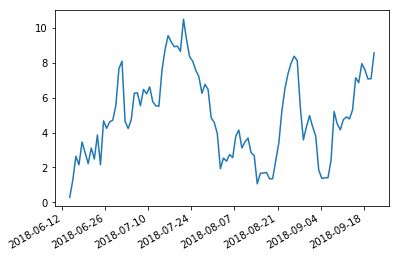

In [116]:
%matplotlib inline
ts = pd.Series(np.random.randn(100), index=pd.date_range('today', periods=100))
ts = ts.cumsum()
ts.plot()

#### 98. DataFrame 折线图

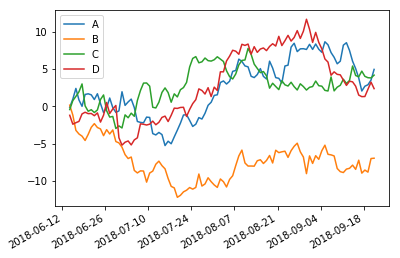

In [119]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()

#### 99. DataFrame 散点图

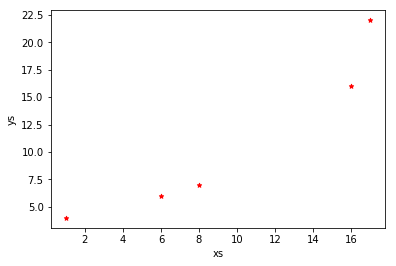

In [124]:
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
# print(df)
df = df.cumsum()
# print(df)
df.plot.scatter("xs","ys",color='red',marker="*")

#### 100. DataFrame 柱形图

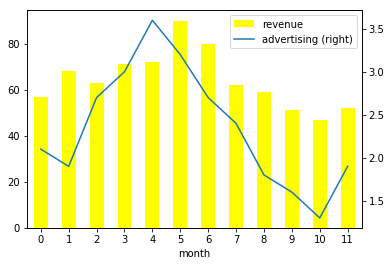

In [121]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar("month", "revenue", color = "yellow")
df.plot("month", "advertising", secondary_y = True, ax = ax)

## <a id = "3">3. 总结</a>

本次教程涉及的知识点主要有：
- 创建Series
- Series基本操作
- 创建DataFrame
- DataFrame基本操作
- DataFrame文件操作
- Series，DataFrame和多索引
- 透视表
- 数据清洗
- 数据预处理
- 可视化